# Rekurencja

Standardowe biblioteki użyte w programie:

In [1]:
import numpy   # numeryka
import math    # funkcje matematyczne
import cmath   # liczby zespolone
import random  # liczby losowe
import time    # pomiar czasu
import statistics as st         # statystyka
import matplotlib.pyplot as plt # grafika

## Wieże Hanoi <a id='hanoi'></a>

Na początek klasyczny przykład algorytmu rekurencyjnego z **rozdz. 1.1**.

Etykiety krążków **disc** zdefiniowane są jako krotka ("A","B","C","D",...), gdzie potrzebujemy co najmniej tyle etykiet, ile wynosi używana później liczba krążków.

In [3]:
disc=("A","B","C","D","E") # użyjemy co najwyżej pięciu krążków

Poniższa funkcja realizuje algorytm rekurencyjny **[1.1]** (który tutaj wypisuje tylko kolejne instrukcje postępowania, tj. kroki algorytmu). Program **han** woła (dwakroć) sam siebie, zawsze z mniejszą o 1 liczbą krążków.

In [4]:
def han(n, init, fin, inter): 
    
# n - liczba krążków
# init   - pręt, na którym są początkowo krążki
# fin    - pręt, na którym mają się na koniec znaleźć krążki
# inter  - pręt pośredni

    if n > 0:   # wykonaj, jeśli są krążki   
        
        han(n-1, init, inter, fin)  # przenieś n-1 krążków z init na inter
        
        print("Przenieś krążek", disc[n-1], "z pręta", init, "na pręt", fin)
                # przenieś krążek n z pręta init na fin (wypisz instrukcję)
            
        han(n-1, inter, fin, init)  # przenieś n-1 krążków z inter na fin

In [5]:
# wykonanie dla trzech krążków
han(3,"1","3","2")

Przenieś krążek A z pręta 1 na pręt 3
Przenieś krążek B z pręta 1 na pręt 2
Przenieś krążek A z pręta 3 na pręt 2
Przenieś krążek C z pręta 1 na pręt 3
Przenieś krążek A z pręta 2 na pręt 1
Przenieś krążek B z pręta 2 na pręt 3
Przenieś krążek A z pręta 1 na pręt 3


Powyżej możemy prześledzić dokładnie "historyjkę" z **[Rys. 1.2]**.

In [6]:
# wykonanie dla czterech krążków 
han(4,"1","2","3")

Przenieś krążek A z pręta 1 na pręt 3
Przenieś krążek B z pręta 1 na pręt 2
Przenieś krążek A z pręta 3 na pręt 2
Przenieś krążek C z pręta 1 na pręt 3
Przenieś krążek A z pręta 2 na pręt 1
Przenieś krążek B z pręta 2 na pręt 3
Przenieś krążek A z pręta 1 na pręt 3
Przenieś krążek D z pręta 1 na pręt 2
Przenieś krążek A z pręta 3 na pręt 2
Przenieś krążek B z pręta 3 na pręt 1
Przenieś krążek A z pręta 2 na pręt 1
Przenieś krążek C z pręta 3 na pręt 2
Przenieś krążek A z pręta 1 na pręt 3
Przenieś krążek B z pręta 1 na pręt 2
Przenieś krążek A z pręta 3 na pręt 2


Poniżej bardziej zaawansowana wersja, gdzie śledzimy kolejne stany (tj. ułożenia krążków) na prętach 1, 2, 3. Stany określone są jako łańcuchy znaków A, B, C, ... etykietujących krążki, tak jak w **rozdz. 1.1**. Liczba kroków **step** określona jest jako **global**, ponieważ inicjalizujemy ją poza funkcją.

In [7]:
def han2(n, init, fin, inter): 
    
# n - liczba krążków
# init   - pręt, na którym są początkowo krążki
# fin    - pręt, na którym mają się na koniec znaleźć krążki
# inter  - pręt pośredni

    global step # liczba kroków
    
    if n > 0:   # zrób, jeśli są krążki                     
        han2(n-1, init, inter, fin)  # przenieś n-1 krążków z init na inter
        
        fin.append(init.pop())
        step+=1 # licz kroki
        print('krok',step,":")
        print('1:',''.join(one))
        print('2:',''.join(two))
        print('3:',''.join(three))
       
        han2(n-1, inter, fin, init)  # przenieś n-1 krążków z inter na fin

In [8]:
# Stan początkowy: wszystkie trzy krążki na pręcie "1", 
# od największego C do najmniejszego A
one   = ['C', 'B', 'A']
two   = []
three = []

step=0

print('krok', step, ":")
print('1:', ''.join(one))
print('2:', ''.join(two))
print('3:', ''.join(three))

han2(3, one, three, two)

krok 0 :
1: CBA
2: 
3: 
krok 1 :
1: CB
2: 
3: A
krok 2 :
1: C
2: B
3: A
krok 3 :
1: C
2: BA
3: 
krok 4 :
1: 
2: BA
3: C
krok 5 :
1: A
2: B
3: C
krok 6 :
1: A
2: 
3: CB
krok 7 :
1: 
2: 
3: CBA


Jeśli interesuje nas tylko liczba kroków algorytmu Hanoi, implementujemy rekurencję **[1.1]** w nastepujacy sposób:

In [14]:
# Ciąg Hanoi
def hanoi(n):
    if n == 1:
        return 1
    else: 
        return 2*hanoi(n-1)+1

Możemy teraz sprawdzić równanie (1.2):

In [15]:
for n in range(1,10): print(n, hanoi(n), 2**n-1)

1 1 1
2 3 3
3 7 7
4 15 15
5 31 31
6 63 63
7 127 127
8 255 255
9 511 511


Pamiętacie mnichów buddyjskich? Przenoszą 64 złote krążki miedzy diamentowymi prętami.

In [65]:
hanoi(64)

18446744073709551615

In [66]:
2**64-1

18446744073709551615

In [18]:
# zakładamy, że jeden ruch trwa 5 sekund i przeliczamy czas na lata

x = (2**64-1)*5/60/60/24/365

# format liczby z wykładnikiem
y = '%.1E' % x
print("czas pracy mnichów:",y,"lat")

w=13.7*10**9 # wiek Wszechświata
print(round(x/w),"razy dłużej od wieku Wszechświata")

czas pracy mnichów: 2.9E+12 lat
213 razy dłużej od wieku Wszechświata


Rekurencja z zadania **[1.10]** posiada $n^2$ w miejsce $1$, co prowadzi do oczywistej modyfikacji:

In [19]:
# ciąg Hanoi, gdzie liczymy przeniesioną masę krążków
# krążek n ma masę n**2
def hanoi_m(n):
    if n == 1:
        return 1
    else: 
        return 2*hanoi_m(n-1)+n**2  # tutaj modyfikacja   

In [20]:
[hanoi_m(n) for n in range(1,11)] # tablica 10 pierwszych wyrazów

[1, 6, 21, 58, 141, 318, 685, 1434, 2949, 5998]

## Ciąg Fibonacciego

Ciąg Fibonacciego **[1.8]** programujemy analogicznie do powyższych przykładów:

In [21]:
def fib(n):
    if n == 1:
        return 1
    elif n==2:
        return 1
    else:
        return fib(n-1)+fib(n-2) # suma dwóch poprzednich wyrazów

In [22]:
fib(9)

34

In [23]:
[fib(i) for i in range(1, 11)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

Kolejne ilorazy $F_{i+1}/F_i$, zaokrąglone do 6 cyfr znaczących:

In [24]:
[round(fib(i+1)/fib(i),6) for i in range(1,16)]

[1.0,
 2.0,
 1.5,
 1.666667,
 1.6,
 1.625,
 1.615385,
 1.619048,
 1.617647,
 1.618182,
 1.617978,
 1.618056,
 1.618026,
 1.618037,
 1.618033]

Jak wiemy z **równ. [1.26]**, powyższe ilorazy dążą do Złotego Podziału $\phi$ **[1.27]**:

In [25]:
phi=(1+math.sqrt(5))/2.
print(phi)

1.618033988749895


Jeśli chcemy utworzyć tablicę kolejnych wyrazów ciągu Fibonacciego, postępujemy następująco:

In [26]:
fi=[]          # pusta tablica
fi.append(1)   # pierwszy wyraz
fi.append(1)   # drugi wyraz 

for i in range(2,20):
    fi.append(fi[i-2]+fi[i-1]) # kolejne wyrazy
    
print(fi)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


## Metoda równana charakterystycznego

(dla rekurencji liniowej rzędu 2, **rozdz. 1.5**) 

Zakładamy, że rekurencja dla ciągu $f_n$ ma postać 

$a f_n + b f_{n-1} + c f_{n-2} = 0$   (przy czym stała a jest różna od 0),

np. dla ciagu Fibonacciego $a=1, b=-1, c=-1$. Rekurencja rzędu 2 wymaga dwóch warunków "początkowych", znamy zatem dwa różne wyrazy ciagu, $n$ i $m$. Słowo "początkowych" ujęte jest w cudzysłów, bowiem niekoniecznie $n=1$, $m=2$, jak w przypadku ciągu Fibonacciego. Wskaźniki $n$ i $m \neq n$ mogą być dowolne i wynikają z natury konkretnego problemu.

Poniższe pomocnicze funkcje obliczają wyróżnik równania kwadratowego $\Delta$ oraz jego pierwiastki:

In [27]:
# delta dla równania kwadratowego
def de(a, b, c):
     return b*b-4*a*c

# pierwiastki równania kwadratowego    
def x1x2(a, b, c):
    d=de(a,b,c)  # wyróżnik
    if d>0:      # dla d>0 pierwiastki są rzeczywiste
        return [(-b+math.sqrt(d))/(2*a),(-b-math.sqrt(d))/(2*a)]
    if d<0:      # dla d<0 pierwiastki są zespolone
        return [(-b+cmath.sqrt(d))/(2*a),(-b-cmath.sqrt(d))/(2*a)] # biblioteka cmath
    if d==0:     # dla d=0 jest jeden podwójny pierwiastek rzeczywisty
        return -b/(2*a)

Oto poszczególne przypadki (symbol **j** oznacza w bibiotece **cmath** jednostkę urojoną):

In [28]:
print(de(1,3,1), x1x2(1,3,1))
print(de(1,2,2), x1x2(1,2,2))
print(de(1,2,1), x1x2(1,2,1))

5 [-0.3819660112501051, -2.618033988749895]
-4 [(-1+1j), (-1-1j)]
0 -1.0


Liczby zespolone wprowadzamy używając symbolu **j**, np. w następujący sposób:

In [29]:
1j**2

(-1+0j)

Algorytm **[1.2]** programujemy w nastepujący sposób: 

In [30]:
def sol_rec(a,b,c,n,an,m,am,i):    
    """
    Rozwiąż rekurencję liniową rzędu 2

    input:
    a, b, c - parametry (a różne od 0)
    n       - wskaźnik jednego znanego wyrazu
    an      -   jego wartość
    m       - wskaźnik drugiego znanego wyrazu (n różne od m)
    am      -   jego wartość
    i       - wskaźnik szukanego wyrazu

    output:
    wartość wyrazu i
    """   
    
    if de(a,b,c) != 0:           # dwa różne pierwiastki (delta różna od 0)
        [x1, x2]=x1x2(a, b, c)
        
        # ogólne rozwiązanie na stałe c1 i c2 
        c1=(an*x2**m - am*x2**n)/(x1**n*x2**m - x1**m*x2**n)
        c2=(-an*x1**m + am*x1**n)/(x1**n*x2**m - x1**m*x2**n)

        return c1*x1**i+c2*x2**i # ogólna postać wyrazu i
    
    else:                        # jeden pierwiastek (delta=0)        
        x=x1x2(a, b, c)
        
        # ogólne rozwiązanie na stałe c1 i c2     
        c1=((am*n)/x**m - (an*m)/x**n)/(n - m)
        c2=(am/x**m - an/x**n)/(m - n)  

        return (c1+c2*i)*x**i    # ogólna postać wyrazu i  

Poniżej sprawdzenie dla ciągu Fibonacciego. Ponieważ wiemy, że wyrazy ciągu są liczbami całkowitymi, w celu uzyskania czytelniejszego wydruku stosujemy funkcje **real** oraz **int**.

In [31]:
[int(sol_rec(1,-1,-1,1,1,2,1,i)).real for i in range(1,11)]

[0, 0, 1, 2, 4, 8, 13, 21, 34, 55]

Inne przykłady:

In [32]:
def round_complex(x): # zaokrąglanie liczb zespolonych
    return complex(round(x.real),round(x.imag))

In [33]:
[int(round_complex(sol_rec(1,-1,1,1,1,2,1,i)).real) for i in range(1,11)]

[1, 1, 0, -1, -1, 0, 1, 1, 0, -1]

In [34]:
[round(sol_rec(1,2,1,1,1,2,1,i)) for i in range(1,11)]

[1, 1, -3, 5, -7, 9, -11, 13, -15, 17]

In [35]:
[int(round_complex(sol_rec(1,-3,3,1,1,2,1,i)).real) for i in range(1,17)]

[1, 1, 0, -3, -9, -18, -27, -27, 0, 81, 243, 486, 729, 729, 0, -2187]

## Błądzenia przypadkowe

### Liczby pseudolosowe

Symulowanie procesów stochastycznych wymaga zastosowania liczb pseudolosowych, wbudowanych we wszystkie zaawansowane języki programowania. Zaczynamy od przykładu kostki do gry **(3.1)**, używając biblioteki **random**.

In [36]:
# kostka do gry: losowa liczba naturalna w zakresie od 1 do 6 
random.randint(1,6)

2

Rzucamy 600000 razy i tworzymy histogram (por. **rys. 3.1**):

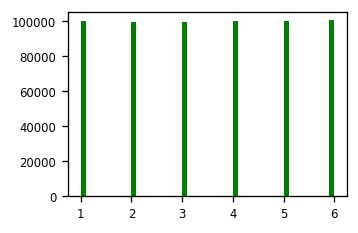

In [39]:
# zbieramy wyniki kolejnych rzutów w tablicy
t=[random.randint(1,6) for i in range(600000)]

plt.figure(figsize=(3,2),dpi=120)                        # rozmiar grafiki
plt.tick_params(axis='both', which='major', labelsize=7) # rozmiar znaczników osi

plt.hist(t, bins=50, facecolor='green')
plt.show();

Widzimy, że każde oczko wypada po około 100000, czyli kostka jest dobra (niesfałszowana!).

### Ruina gracza

W problemie ruiny gracza (**rozdz. 1.7**) losowanie odbywa się "sfałszowaną" monetą, gdzie prawdopodobieństwo uzyskania orła wynosi $p$, a reszki $q=1-p$. Poniżej tworzymy generator liczb losowych, który zwraca 1 z prawdopodobieństwem $p$ oraz -1 z prawdopodobieństwem $q$. Uzyskanie 1 oznacza przejście do stanu posiadania większego o 1, a -1 do stanu posiadania mniejszego o 1 (zob. **rys. 1.8**).

In [40]:
def coin(p):
# zwróć 1 z prawdopodobieństwem p lub -1 z prawdopodobieństwem q=1-p 

    if random.uniform(0,1)<p: # gdy liczba losowa rozłożona jednorodnie 
                              # w przedziale (0,1) jest mniejsza od p 
                              # (tj. prawdopodobientwo tegoż wynosi p)
        return 1              # zwróć 1
    else:                     # w przeciwnym razie
        return -1             # zwróć -1

Sprawdzamy teraz działanie funkcji **coin** (analogicznie jak dla kostki do gry powyżej). Parametr **weights** zmienia wysokość słupków tak, aby odpowiadała ona względnej częstości uzyskania 1 lub -1.

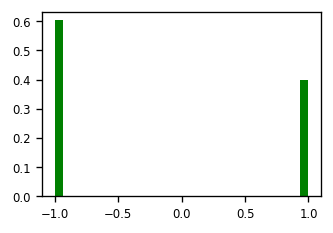

In [41]:
p=0.4      # prawdopodobieństwo orła
nu=100000  # liczba rzutów 
t=[coin(p) for k in range(1,nu)]

plt.figure(figsize=(3,2),dpi=120)                        # rozmiar grafiki
plt.tick_params(axis='both', which='major', labelsize=7) # rozmiar znaczników osi

plt.hist(t, bins=30, facecolor='green',weights=1/nu*numpy.ones_like(t))
plt.show();

Pełna symulacja ruiny gracza jest nastepująca: 

czas wykonania symulacji: 26.5 s


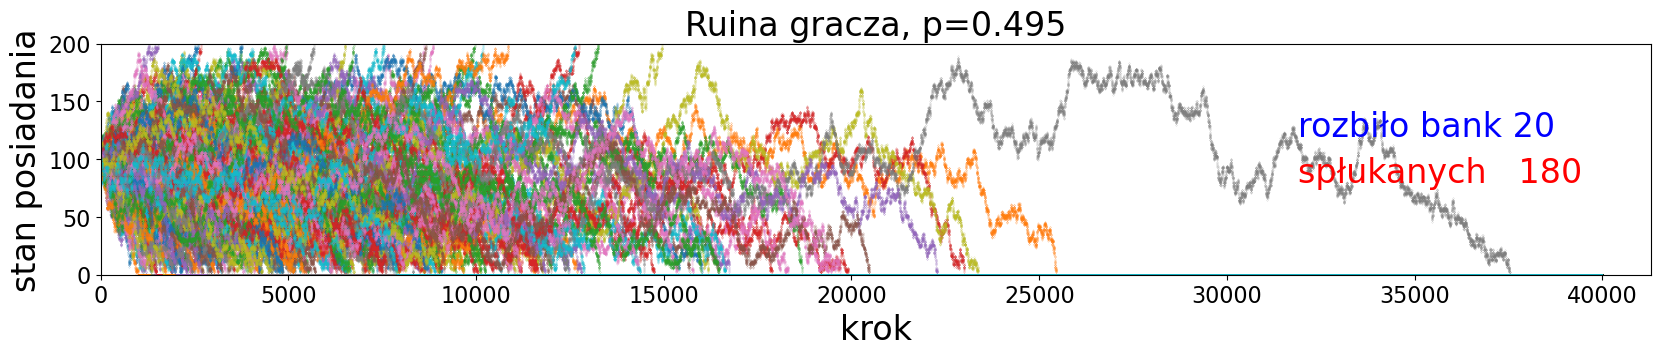

In [43]:
time0 = time.time()   # czas startu do pomiaru czasu wykonania programu

n = 40000       # maksymalna liczba kroków (tj. pojedynczych gier dla jednego gracza)
p = 0.495       # prawdopodobieństwo wygrania w pojedynczej grze (uzyskania orła)
q = 1-p         # prawdopodobieństwo przegrania w pojedynczej grze

players   = 200 # całkowita liczba graczy
players_b = 0   # aktualna liczba graczy, którzy rozbili bank

start = 100     # początkowa liczba monet u każdego z graczy
fin   = 200     # liczba monet u gracza, przy której następuje rozbicie banku

x = list(range(n)) # współrzędne x (nr kroku, tj. kolejnej pojedynczej gry)
    
# ustawienia rysunku
plt.figure(figsize=(20,3))                     # rozmiar
plt.title("Ruina gracza, p=" + str(p),fontsize=24) # tytuł
plt.xlim(0,n-1)                                    # zakresy osi
plt.ylim(0,fin)
plt.xlabel('krok',fontsize=24)                     # etykiety osi
plt.ylabel('stan posiadania',fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16) # rozmiar znaczników osi


# losowe kolory RGB dla poszczególnych graczy
col = [(random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)) 
        for _ in range(players)]

# czasy gry dla wszystkich, tych co rozbili bank i tych, co się spłukali
ti=[] 
ti_b=[]
ti_0=[]

for k in range(players): # pętla po graczach

    y = numpy.zeros(n)   # inicjalizacja macierze    
    i=0                  # początek gry, krok 0
    y[0]=start           # stan posiadania w kroku 0

    while i < n-1: 
        i+=1                  # kolejny krok     
        y[i]=y[i-1] + coin(p) # posiadanie losowo zwieksza się lub zmniejsza o 1
        if y[i]==0:           # jeśli spłukany po i grach
            ti_0.append(i)    # zapisz liczbę kroków (czas gry)
            break             # wyjdź
        if y[i]==fin:         # jeśli rozbił bank po i grach
            players_b+=1      # zwiększ o 1 liczbę graczy, którzy rozbili bank
            ti_b.append(i)    # zapisz liczbę kroków (czas gry)
            break             # wyjdź
            
    plt.scatter(x, y, s=0.01, label=str(k+1)) # zrób wykres dla gracza k
    ti.append(i)                              # zapisz czas gry

lw= max(ti)         # najdłuższy czas gry

plt.xlim(0,1.1*lw)  # zakres osi x o 10% dłuzszy od najdłuższego czsu gry 
    
# wstawka tekstowa do rysunku
plt.text(x=0.85*lw, y=80, s="spłukanych  "+str(len(ti_0)),fontsize=24, color='red')
plt.text(x=0.85*lw, y=120, s="rozbiło bank "+str(len(ti_b)),fontsize=24, color='blue')

# pomiar czasu umożliwia oszacowanie jak długo potrwają obliczenia przy wydłużeniu danych
# w naszym przypadku rośnie on liniowo z liczbą graczy
time1 = time.time()
print("czas wykonania symulacji:", round(time1 - time0, 1),"s")

plt.show()

Możemy porównać oszacowane z powyższej symulacji prawdopodobienstwo rozbicia banku (równe stosunkowi liczby graczy, którzy rozbili bank, do wszystkich graczy), z dokładnym wzorem na prawdopodobieństwo **[1.45]**:

In [44]:
print("oszacowane z symulacji prawd. rozbicia banku =",round(players_b/players,2),
      "\npowinno być (dla b. dużej liczby graczy)",round((1-(q/p)**start)/(1-(q/p)**fin),2))

oszacowane z symulacji prawd. rozbicia banku = 0.1 
powinno być (dla b. dużej liczby graczy) 0.12


Podobnie, oszacowany średni czas gry porównyjemy do wzoru **(1.48)**:

In [45]:
print("średni czas gry:",round(st.mean(ti),1),", powinno być (dla b. dużej liczby graczy) ",
      round((-fin*(q/p)**start+start*(q/p)**fin)/(1-(q/p)**fin)/(p-q),1))

print("średni czas gry dla tych, co rozbili bank:",round(st.mean(ti_b),1))

print("średni czas gry dla tych, co się spłukali:",round(st.mean(ti_0),1))

średni czas gry: 7933.7 , powinno być (dla b. dużej liczby graczy)  7429.5
średni czas gry dla tych, co rozbili bank: 7883.3
średni czas gry dla tych, co się spłukali: 7939.3


Widzimy, że średni czas gry dla graczy, którzy rozbili bank, jest dłuższy niż dla tych, co się spłukali (co jest intuicyjne dla $p<0.5$).

Ciekawe jest popatrzyć na rozkład czasów gry dla poszczególnych graczy (por. **rys. [1.11]):

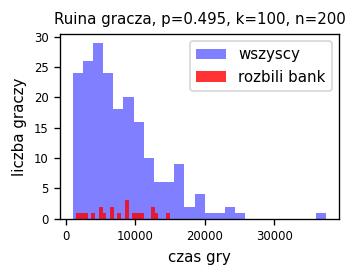

In [46]:
plt.figure(figsize=(3,2),dpi=120)                        # rozmiar grafiki

num_bins = 25   # liczba przedziałów histogramu
plt.hist(ti, num_bins, facecolor='blue', alpha=0.5,label="wszyscy")
plt.hist(ti_b, num_bins, facecolor='red', alpha=0.8,label="rozbili bank")
plt.title("Ruina gracza, p="+str(p)+", k="+str(start)+", n="+str(fin),fontsize=9) 
plt.xlabel('czas gry',fontsize=9)
plt.ylabel('liczba graczy',fontsize=9)
plt.tick_params(axis='both', which='major', labelsize=7) # rozmiar znaczników osi
plt.legend(prop={'size':9})                              # legenda
plt.show()

## Silnia jako rekurencja

Obliczamy rekurencyjnie silnię:

In [47]:
def fact(n):
    if n == 0:
        return 1
    else:
        return n*fact(n-1)

In [48]:
fact(7)

5040

In [49]:
# biblioteki matematyczne Pythona mają wbudowaną silnię, np.
math.factorial(7)

5040

Sprawdzimy teraz, jak działa wzór Stirlinga z poprawką **[2.9]** (bierzemy tylko jeden człon poprawki $1/12n$):

In [50]:
def stirling(n):
    return math.sqrt(2*math.pi*n)*(n/math.e)**n*(1+1/(12*n))

In [51]:
for n in range(1,20):
    print(n,math.factorial(n),
          round((stirling(n)-math.factorial(n))/math.factorial(n)*100,3),"%")

1 1 -0.102 %
2 2 -0.052 %
3 6 -0.028 %
4 24 -0.017 %
5 120 -0.012 %
6 720 -0.008 %
7 5040 -0.006 %
8 40320 -0.005 %
9 362880 -0.004 %
10 3628800 -0.003 %
11 39916800 -0.003 %
12 479001600 -0.002 %
13 6227020800 -0.002 %
14 87178291200 -0.002 %
15 1307674368000 -0.001 %
16 20922789888000 -0.001 %
17 355687428096000 -0.001 %
18 6402373705728000 -0.001 %
19 121645100408832000 -0.001 %


Widzimy, że przybliżenie działa bardzo dokładnie, do ułamka procenta, nawet dla małych $n$. Uwzględnienie kolejnych członów we wzorze **[2.9]** jeszcze bardziej ulepsza wynik.

## Rekurencja w dwóch wymiarach <a id='d2'></a>

### Symbol Newtona

Skonstruujemy trójkąt Pascala, **rys. 2.7** (pamietamy, że "+" łączy listy): 

In [52]:
newton=[] # inicjalizacja pustej tablicy

# dodanie [1] jako elementu 0 tablicy
newton.append([1])

# zrobimy 12 wierszy
for n in range(1,12):
    # wiemy, że po bokach są jedynki, stąd [1]+  i   +[1]
    # w środku pętla po k daje (n-1) elementów 
    # każdy jest sumą elemntów z wiersza wyżej w pozycji k-1 oraz k  
    newton.append([1]+[newton[n-1][k-1]+newton[n-1][k] for k in range(1,n)]+[1])

Tablica **newton** jest dwuwymiarowa:

In [53]:
newton

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1],
 [1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1]]

Ładniejszy wydruk uzyskujemy poprzez sformatowane wypisywanie:

In [54]:
for n in range(12):
    row_format ="{:>4}" * (n+1)
    print((12-n)*"  ",row_format.format(*newton[n]))

                            1
                          1   1
                        1   2   1
                      1   3   3   1
                    1   4   6   4   1
                  1   5  10  10   5   1
                1   6  15  20  15   6   1
              1   7  21  35  35  21   7   1
            1   8  28  56  70  56  28   8   1
          1   9  36  84 126 126  84  36   9   1
        1  10  45 120 210 252 210 120  45  10   1
      1  11  55 165 330 462 462 330 165  55  11   1


Sprawdzamy, że suma elementów w wierszu trójkąta Pascala daje $2^n$, zgodnie ze wzorem **[2.14]**:

In [55]:
for n in range(12):
    print(sum(newton[n]),2**n)

1 1
2 2
4 4
8 8
16 16
32 32
64 64
128 128
256 256
512 512
1024 1024
2048 2048


Podobnie, suma elementów w wierszu trójkąta Pascala mnożonych naprzemiennie przez $-1$ daje 0, zgodnie ze wzorem **[2.15]**:

In [56]:
for n in range(12):
    s=0
    for k in range(n+1):
        s=s+newton[n][k]*(-1)**k
    print(s)

1
0
0
0
0
0
0
0
0
0
0
0


A teraz liczby Fibonacciego, ukryte w trójkacie Pascala wg **rys. [2.12]**:

In [57]:
for n in range(12):
    s=0
    for k in range(n//2+1):
        s=s+newton[n-k][k]
    print(s)

1
1
2
3
5
8
13
21
34
55
89
144


### Liczby Stirlinga I rodzaju (cyklowe)

Wzory wzięte są z **tw. 4.1**. Procedura jest programistycznie analogiczna do trójkąta Pascala, jedynie po lewej stronie mamy [0] i rekurencja ma inną postać:

In [58]:
stir_c=[]
stir_c.append([1])

for n in range(1,12):
    stir_c.append([0]+[stir_c[n-1][k-1]+(n-1)*stir_c[n-1][k] for k in range(1,n)]+[1])

In [59]:
for n in range(9):
    row_format ="{:>6}" * (n+1)
    print(row_format.format(*stir_c[n]))

     1
     0     1
     0     1     1
     0     2     3     1
     0     6    11     6     1
     0    24    50    35    10     1
     0   120   274   225    85    15     1
     0   720  1764  1624   735   175    21     1
     0  5040 13068 13132  6769  1960   322    28     1


Suma elementów w wierszu daje n! - liczbę wszystkich permutacji:

In [60]:
for n in range(0,12):
    print(sum(stir_c[n]),math.factorial(n))

1 1
1 1
2 2
6 6
24 24
120 120
720 720
5040 5040
40320 40320
362880 362880
3628800 3628800
39916800 39916800


Suma elementów w wierszu mnożonych naprzemiennie przez $-1$ daje 0, począwszy od $n=2$ 

In [61]:
for n in range(12):
    s=0
    for k in range(n+1):
        s=s+stir_c[n][k]*(-1)**k
    print(s)

1
-1
0
0
0
0
0
0
0
0
0
0


### Liczby Stirlinga II rodzaju (podziałowe)

Teraz bierzemy wzory z **tw. 4.2**:

In [62]:
stir_p=[]
stir_p.append([1])

for n in range(1,12):
    stir_p.append([0]+[stir_p[n-1][k-1]+k*stir_p[n-1][k] for k in range(1,n)]+[1])

In [63]:
for n in range(10):
    row_format ="{:>5}" * (n+1)
    print(row_format.format(*stir_p[n]))

    1
    0    1
    0    1    1
    0    1    3    1
    0    1    7    6    1
    0    1   15   25   10    1
    0    1   31   90   65   15    1
    0    1   63  301  350  140   21    1
    0    1  127  966 1701 1050  266   28    1
    0    1  255 3025 7770 6951 2646  462   36    1


Sumy w poszczególnych wierszach tworzą liczby Bella, zgodnie ze wzorem **[4.6]**:

In [64]:
for n in range(12):
    print(n,sum(stir_p[n]))

0 1
1 1
2 2
3 5
4 15
5 52
6 203
7 877
8 4140
9 21147
10 115975
11 678570


## Zadania

Wszystkie zadania dotyczą programowania w Pythonie. Zadania "teoretyczne" znajduja się w podstawowej części książki.

1. Rozwiaż zad. [1.1] z pomocą funkcji sol_rec.

2. Utwórz funkcję realizującą rekurencję pierwszego rzędu z członem niejednorodnym postaci $a+b n$ i rozwiąż numerycznie problem dzielenia pizzy z zad. [1.2]).

3. Wygeneruj liczby Fibonacciego i sprawdź numerycznie wszystkie przypadki z zad. [1.5] oraz [1.6].

4. Utwórz funkcję realizującą rekurencję z zad. [1.12].

5. Zmodyfikuj kod dla Ruiny gracza z wykładu, aby rozwiązać zad. [1.21], [1.22] i [1.23].

6. Oblicz i narysuj trójkąt liczb Bella z rys. [4.5].

7. Oblicz i narysuj trójkąt partycji $p(n,k)$ ze wzoru [4.20],  rys. [4.11].

8. Oblicz i narysuj trójkąt partycji $q(n,k)$ ze wzoru [4.24],  rys. [4.13].

9. Uruchom program ilustrujący algorytm Kratsuby-Ofmana (rozdz. [1.8]) ze strony 
www.codeandgadgets.com/karatsuba-multiplication-python/ i przedyskutuj wyniki.
      